# dependencias 

In [1]:
from youtube_transcript_api import YouTubeTranscriptApi
import youtube_dl
import re
import nltk

# funciones para el limpiado de los datos

In [2]:
def obtener_enlaces_lista_reproduccion(url_lista):
    # Configuración de youtube_dl para obtener solo los enlaces de la lista de reproducción
    ydl_opts = {'extract_flat': True}

    with youtube_dl.YoutubeDL(ydl_opts) as ydl:
        # Obtener información de la lista de reproducción
        playlist_info = ydl.extract_info(url_lista, download=False)
        
        # Extraer los enlaces de los videos de la lista de reproducción
        enlaces = [video['url'] for video in playlist_info['entries']]

    return enlaces

def obtener_subtitulos_video(url_video):
    try:
        srt = YouTubeTranscriptApi.get_transcript(url_video, languages=['es'])
        subtitulos = [i['text'] for i in srt]
        subtitulos = ' '.join(subtitulos)
        return subtitulos
    except:
        return None

def obtener_subtitulos_videos(lista_enlaces):
    subtitulos = []
    for enlace in lista_enlaces:
        sub = obtener_subtitulos_video(enlace)
        if sub:
            subtitulos.append(sub)
    return subtitulos
            


In [3]:
# lista de los url caso 6
lista_enlaces_caso_6 = obtener_enlaces_lista_reproduccion('https://www.youtube.com/playlist?list=PLbtegW3d3L4IpwMvfSW8ceoeVoP5p2iiH')
# obtener los subtitulos de los videos caso 6
subtitulos_caso_6 = obtener_subtitulos_videos(lista_enlaces_caso_6)
# lista de los url caso 7 por lista de reproduccion
lista_enlaces_caso_7_lista_1 = obtener_enlaces_lista_reproduccion('https://www.youtube.com/playlist?list=PLbtegW3d3L4I3jzi1nnExmLhDPP2_63yr')
lista_enlaces_caso_7_lista_2 = obtener_enlaces_lista_reproduccion('https://www.youtube.com/playlist?list=PLbtegW3d3L4K-BNKcKeV4nsvklh1Qi601')
lista_enlaces_caso_7_lista_3 = obtener_enlaces_lista_reproduccion('https://www.youtube.com/playlist?list=PLbtegW3d3L4In21BprlyQuW8u0oL6lTXS')
# obtener los subtitulos de los videos caso 7 por lista de reproduccion
subtitulos_caso_7_lista_1 = obtener_subtitulos_videos(lista_enlaces_caso_7_lista_1)
subtitulos_caso_7_lista_2 = obtener_subtitulos_videos(lista_enlaces_caso_7_lista_2)
subtitulos_caso_7_lista_3 = obtener_subtitulos_videos(lista_enlaces_caso_7_lista_3)

[youtube:tab] PLbtegW3d3L4IpwMvfSW8ceoeVoP5p2iiH: Downloading webpage
[download] Downloading playlist: Caso 06 de la JEP | Unión Patriótica (UP)
[youtube:tab] Downloading page 1
[youtube:tab] playlist Caso 06 de la JEP | Unión Patriótica (UP): Downloading 22 videos
[download] Downloading video 1 of 22
[download] Downloading video 2 of 22
[download] Downloading video 3 of 22
[download] Downloading video 4 of 22
[download] Downloading video 5 of 22
[download] Downloading video 6 of 22
[download] Downloading video 7 of 22
[download] Downloading video 8 of 22
[download] Downloading video 9 of 22
[download] Downloading video 10 of 22
[download] Downloading video 11 of 22
[download] Downloading video 12 of 22
[download] Downloading video 13 of 22
[download] Downloading video 14 of 22
[download] Downloading video 15 of 22
[download] Downloading video 16 of 22
[download] Downloading video 17 of 22
[download] Downloading video 18 of 22
[download] Downloading video 19 of 22
[download] Downloadin

In [4]:
print(len(subtitulos_caso_6),len(subtitulos_caso_7_lista_1),len(subtitulos_caso_7_lista_2),len(subtitulos_caso_7_lista_3),sep='\n') # 6/7/7/7


20
28
15
13


# limpieza de datos 

## funciones para la limpieza de datos

In [5]:
def normalizacion_regex_texto(texto):
    # Eliminar caracteres o palabras entre [] y ()
    texto = re.sub(r'\[.*?\]', '', texto)
    texto = re.sub(r'\(.*?\)', '', texto)
    # eliminar letras individuales 
    texto = re.sub(r'\b\w\b', '', texto)
    # minimizar, limpieza de espacios, eliminacion de puntuacion  
    palabras = nltk.tokenize.word_tokenize(texto)
    palabras = [palabra.lower() for palabra in palabras if palabra.isalpha()]
    texto = ' '.join(palabras)
    # eliminar acentos o tildes
    texto = re.sub(r'[áéíóúÁÉÍÓÚ]', lambda x: 'aeiouAEIOU'['áéíóúÁÉÍÓÚ'.index(x.group(0))], texto)
    
    return texto

def contar_palabras_con_numeros(texto):
    # Encuentra todas las palabras que contienen al menos un número
    palabras_con_numeros = re.findall(r'\b\w*\d\w*\b', texto)
    
    # Inicializa un diccionario para el conteo de palabras
    conteo_palabras = {}
    
    # Itera sobre las palabras encontradas y cuenta cada una
    for palabra in palabras_con_numeros:
        if palabra in conteo_palabras:
            conteo_palabras[palabra] += 1
        else:
            conteo_palabras[palabra] = 1
    return conteo_palabras

def eliminar_texto_con_numeros(texto):
    texto = re.sub(r'\b\w*\d\w*\b', '', texto)
    return texto

def eliminar_stop_words(texto,stop_words):
    '''eliminar stopwords'''
    palabras = texto.split()
    palabras = [word for word in palabras if word not in stop_words]
    texto = ' '.join(palabras)
    return texto

In [19]:
# conteo de palabras
conteo_palabras_caso_6 = contar_palabras_con_numeros(subtitulos_caso_6[0])
# eliminar texto con numeros
subtitulos_caso_6_1= eliminar_texto_con_numeros(subtitulos_caso_6[0])
# normalizar texto
subtitulos_caso_6_1 = normalizacion_regex_texto(subtitulos_caso_6_1)
# eliminar stopwords
## cargamos las palabras 
with open('../input/stop_words_taller4.txt','r') as f:
    stop_words = f.read().splitlines()
subtitulos_caso_6_1 = eliminar_stop_words(subtitulos_caso_6_1,stop_words)

In [20]:
subtitulos_caso_6_1

'hablen listo siendo mañana lunes diciembre escrito auxiliar judicial despacho magistrado gustavo salazar vaz permite dar inicio continuacion diligencia version voluntaria compareciente ivan ramirez quintero convocada mediante autos at diciembre at julio caso denominado victimizacion miembros union patriotica parte agentes efectos presente tramite advierten siguientes pautas cuenta desarrollo diligencia primero sujetos procesales intervinientes podran hacer uso palabra unicamente autorizados magistrado segundo sujetos procesales intervinientes deben emplear lenguaje tono respetuoso interlocutores asistentes diligencia tercero intervinientes podran tomar registros fotograficos audio video diligencia cuarto prohibe acto atente dignidad partes quinto advierte sesion grabada hara parte expediente caso trasladada victimas segun indicado articulo numeral cuarto ley sexto caso incumplimiento cualquiera obligaciones magistrado podra hacer uso poderes correccionales definidos articulo ley conco

# frecuecia de las palabras

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\bcriv\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\bcriv\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


3837


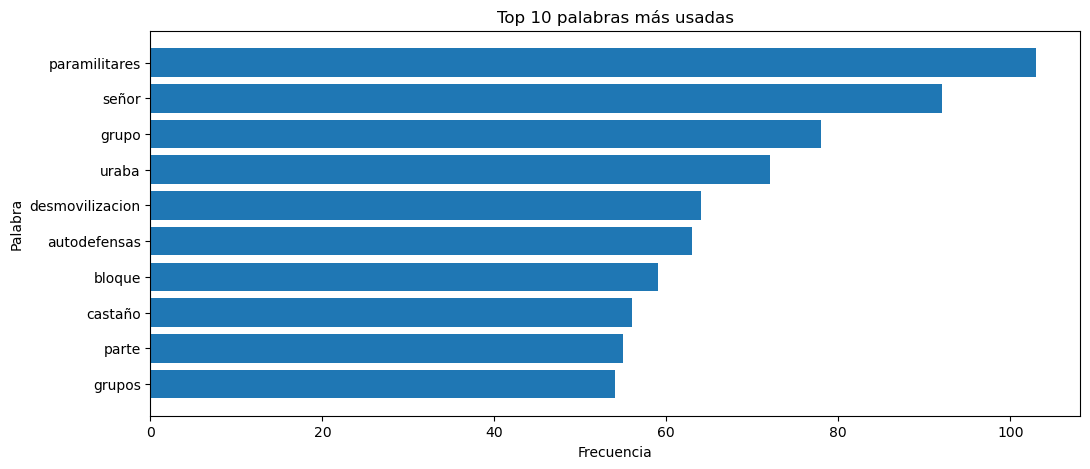

In [23]:
import matplotlib.pyplot as plt
from collections import Counter

from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('stopwords')

def plot_top_words(text, num_words=100):
    '''Genera un gráfico de barras con las palabras más comunes en un texto luego de ser limpiado y tokenizado.'''
    # separar el texto en palabras
    words = text.split(' ')
    words = [word.lower() for word in words if word.isalpha()]
    # Contar la frecuencia de cada palabra
    word_freq = Counter(words)
    print(len(word_freq))

    # Obtener las palabras más comunes
    top_words = word_freq.most_common(num_words)

    # Preparar datos para el gráfico
    words, freq = zip(*top_words)
    
    # Crear el gráfico de barras
    plt.figure(figsize=(12, 5))
    plt.barh(range(len(words)), freq, align='center')
    plt.yticks(range(len(words)), words)
    plt.gca().invert_yaxis()  # Invertir el eje y para que las palabras más comunes estén en la parte superior
    plt.xlabel('Frecuencia')
    plt.ylabel('Palabra')
    plt.title(f'Top {num_words} palabras más usadas')
    plt.show()


# Generar el gráfico
plot_top_words(subtitulos_caso_6_1,10)
